<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/TA_Sessions/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Operations Research - Simulation
#### Bart Bennett / Ignacio Lara
#### Spring 2022
<hr />

# PyPlot and Graphing in Python
<div>
<img src='https://i.kym-cdn.com/photos/images/facebook/001/827/327/2ad.jpg' width=400 height=400 />
</div>

(For legal reasons, the above graph was not generated in PyPlot. But it could be...)

>Note: For much of this notebook, I will be shamelessly stealing code and figures from [this](https://realpython.com/python-matplotlib-guide/) outstanding guide. The interested reader will find lots to enjoy.

## Origins

`matplotlib` started being developed around 2003 by a neurobiologist named John D. Hunter. Dr. Hunter was used to working extensively in MATLAB, and wanted to bring MATLAB-esque plotting to Python. Thus, `matplotlib` was born. Originally, the "translation" was implemented in an API called `pylab`, which was so true to MATLAB that it essentially amounted to a global import of everything, i.e. `from pylab import *`. **No!! Bad!!** This is very un-Pythonic, because the potential for conflicts and "masking" (when two functions from different modules have the same name and the computer gets confused) is huge.

Fortunately, the `matplotlib` community has moved on, and indeed its documentation explicitly advises against using `pylab`, noting it is included for "historical reasons." So, unless you're feeling particularly nostalgic, I suggest joining the coders of today in the world of `pyplot` -- the modern, Pythonic way to plot. `pyplot` is the workhorse package in the massive `matplotlib` library...it is `pylab` with a major facelift.

By convention, `pyplot` is imported with the alias `plt`, like so: `import matplotlib.pyplot as plt`

## Matplotlib Object Hierarchy

This section of the RealPython tutorial is what sets it apart from nearly all other introductory PyPlot tutorials. I fumbled around with `plt.plot()` and `fig, ax = plt.subplots()` aimlessly for quite a while before I found this gem, and once I did, about 30-50 facepalms occurred in my brain simultaneously. Understanding this figure will save you hours of your time, and probably a few hairs on your head. Ready? Here it is:

![matplotlib-hierarchy](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

What's the big deal? I want you to understand the difference between a `Figure` and an `Axes`. That's right, `Axes` is _singular_. Specifically, an `Axes` object represents one "graph" in the traditional sense (you can think of it as a pair of "little-a" axes--in matplotlib, two `Axis` objects--which come together to form a graph).

A `Figure`, in contrast, is a container for one _or multiple_ `Axes` objects. Say, for example, you wanted to have several small plots displayed in a grid with each other, and include a big title at the top (for those with R exposure, this is often referred to as a "facet wrap"). And maybe the plots are all scaled the same, and you want to de-clutter by not drawing the axes (little a) on each subplot. That's exactly what a `Figure` is for: it can contain multiple related `Axes`es in a variety of different ways, such as one might want for a "figure" in a research paper...or Colab notebook.

This understanding, combined with the next section, will greatly demystify the confusing smattering of calls to `plt.whatever` and `ax.set_whatever` that you will come across on StackOverflow.

## Stateful vs Stateless

In this context, statefulness can be thought of as a computer's awareness of what it is doing and where it has been (the human, not computer, definition of "memory"). In contrast, statelessness is a lack of this awareness. What does this have to do with PyPlot? Well, you can work with `matplotlib` in _either_ a stateful or stateless way, or even both at the same time, and therein lies much of the confusion for new PyPlotters between calls to `pyplot` itself, such as `plt.plot()`, and calls to specific `Axes` objects, which often start with something like `fig, ax = plt.subplots()`.

`matplotlib` is stateful because it has the concept of a "current" `Figure` and `Axes` object. That is, if you don't specify which one you're talking about, it will operate on whichever one it previously "looked at." If it hasn't looked at anything, it will create a new object. **Calls to `pyplot` directly, like `plt.plot()`, default to operating on the _current_ `Figure` and `Axes`. This is stateful `matplotlib`.**

Stateless `matplotlib`, then, requires the coder to specify explicitly which `Figure` or `Axes` you wish to operate on. Statelessness is synonymous with an object-oriented (OO) architecture...the computer does not "remember" which object it was working with last time, it needs to be given an object reference each time an operation is desired.

Putting the two together demonstrates one of the most common `pyplot` workflows. With almost no Googling effort, you will find plotting code that looks like this:
```
fig, ax = plt.subplots()

ax.plot(xs, y1, label='first series')
ax.plot(xs, y2, label='second series')
...
ax.set_xlabel('The x axis')
ax.set_ylabel('The y axis')
...

plt.legend()
plt.show()
```

Let's break it down. The first line `fig, ax = plt.subplots()` is stateful. With no additional arguments, it simply returns a tuple object, representing the current `Figure` and `Axes` (often times, newly-created ones). The left hand side of our code assigns these to the variables `fig` and `ax` respectively.

The middle portion is stateless. It is calling methods on the specific `Axes` object we stored in `ax`. 

Finally, the last portion is again stateful, first putting a legend on the current `Figure`, and finally displaying the graphic for us to see.

You will also see another type of workflow quite often, especially for simpler cases. This approach does not deal with the `Axes` object explicitly at all, instead relying purely on stateful code with calls to `pyplot`, like this:
```
plt.plot([1, 2, 3, 4, 5, 6])
...
plt.title('My graph')
plt.xlabel('My x axis')
plt.ylabel('My y axis')
...
plt.legend()
plt.show()
```

Note that the axis labels can be set in two ways, either with `ax.set_xlabel()` or `plt.xlabel()`. This is true for most things in `matplotlib`, including the fact that the names don't match between the two. Documentation will be your friend here.

That's it for your required reading. It's more wordy than I typically like on a code-oriented notebook, but I assure you, past me would've paid current me a hefty sum to spend 5 minutes understanding this _before_ jumping straight into code. It will make the flexibility and versatility of `pyplot` so much clearer. Or at least, so I hope.

## Python time!

By now, you can probably guess what the first cell will be. Answers other than "importing the libraries we need like `pyplot` and `numpy`" owe me lunch at the RAND cafe.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Next, we need to generate some data. For the first example, lets start with an iteration plot, i.e. how a value changes over time given a particular step function.

### Iteration plot

Here's the function: $W_t = 0.95W_{t-1} + 1500, \quad W_0 = 1200$. We want to plot $W$ vs. $t$. So first, let's write a couple of functions to actually perform the iterations and generate our data.

In [ ]:
def w_step(w_old):
    return 0.95*w_old + 1500

def iter_plot_data(step_fn, init_value=0, iters=100):
    vals = np.empty(iters)
    vals[0] = init_value

    for i in range(1, iters):
      vals[i] = step_fn(vals[i-1])

    return vals

In [ ]:
print(w_step(1200))
vals = iter_plot_data(w_step, init_value=1200, iters=5)
print(vals)

2640.0
[1200.   2640.   4008.   5307.6  6542.22]


The first function `w_step` is a translation of our difference equation into code. That is, it takes a value for $W_{t-1}$ and returns a value $W_t$. 

The second function `iter_plot_data` generates the data that we need for an iteration plot. Specifically, it creates an empty numpy array `vals` of length `iters`, sets the initial condition to `init_value`, then calls any step function `step_fn` repeatedly for `iters` iterations, storing the results in `vals`.

So let's just look at the first 100 iterations of our `w_step` function. Note that the default value for `iters=100`, so you technically don't need to include it in the function call. But it is often good coding practice to make your optional arguments explicit. Let's store the results in the array `ws`.

In [ ]:
ws = iter_plot_data(w_step, init_value=1200, iters=100)
print(ws[:10])

[ 1200.          2640.          4008.          5307.6
  6542.22        7715.109       8829.35355     9887.8858725
 10893.49157887 11848.81699993]


Now we're ready to do some plotting. In this case, a simple line plot can be called directly with `plt.plot()`, but I personally recommend getting into the habit of using the stateless workflow we described earlier, and working with a specific `Axes` object. Check out the docstrings for [`matplotlib.pyplot.plot`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html) and [`matplotlib.axes.Axes.plot`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.plot.html) methods and you'll find hugely flexible functions. But the simplest call for both methods is of the form `plot([x], y, [fmt])`. Arguments in brackets `[]` are optional, so you'll see that all you need for a simple line plot is the `y`-axis data! Let's take a look:

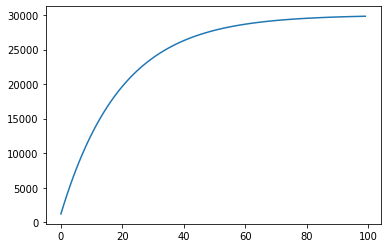

In [ ]:
fig, ax = plt.subplots()

ax.plot(ws)

plt.show()

It is very common to use the `fmt` argument to quickly change the appearance (or format) of the plotted series. See the Notes section of the documentation for a full description of all of the options, but the format string has the form `[marker][line][color]`. 
* `marker` specifies the appearance of the actual data points, e.g. `'o'` for circle or `'s'` for square. (default is no marker)
* `line` specifies the appearance of the connecting line between them, e.g. `'-'` for solid (the default), `'--'` for dashed, or `':'` for dotted.
* `color` specifies the...color. There is a default sequence for multiple data series, typically blue, orange, green, ... but this allows you to specify a desired color. Examples are `'b'` for blue, `'k'` for black, `'g'` for green.

Remember that all three of these are optional, so you can specify one, two, or all three aspects in the format string. For example, if you wanted a red dotted line, you could pass `':r'`. If you wanted black circle markers with a dashed line, you could pass `'o--k'`. Note that the documentation says "`fmt` cannot be passed as a keyword." This just means we omit the `fmt=` part that would normally accompany optional (keyword) argument specifications.

Some other common features are to set axis labels, using either `plt.xlabel()` or `ax.set_xlabel()`, and a title using either `plt.title()` or `ax.set_title()`. So let's redo our plot just a little bit with some of these enhancements:

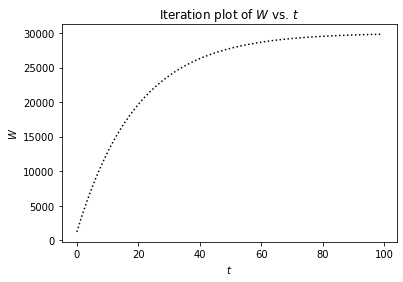

In [ ]:
fig, ax = plt.subplots()

ax.plot(ws, ':k')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$W$')
ax.set_title(r'Iteration plot of $W$ vs. $t$')

plt.show()

### Return plot

What if we were interested in seeing a different representation of our function? Specifically, we want to know where each value for $W_{t-1}$ would lead to $W_t$. This plot of $W_t$ vs. $W_{t-1}$ is known as a **return plot**.

Can we do this without any additional data generation? Yes! Think about what the x and y data would be to make this plot work. For example, the point corresponding to $t=10$ would be represented by $(W_9, W_{10})$. The point for $t=11$ would be $(W_{10}, W_{11})$, and so on.

That is, the x axis is exactly the same as the y axis, _shifted to the left by one_. Said another way, the x axis contains all but the last element of `ws`, and the y axis contains all but the initial (zeroth) element of `ws`. Here's what that looks like in Python:

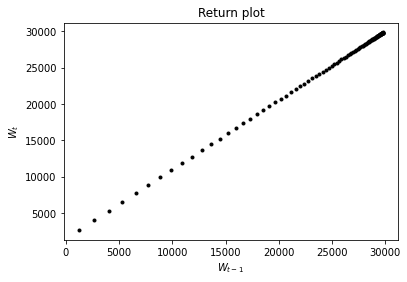

In [ ]:
fig, ax = plt.subplots()

ax.plot(ws[:-1], ws[1:], '.k')
ax.set_xlabel(r'$W_{t-1}$')
ax.set_ylabel(r'$W_t$')
ax.set_title('Return plot')

plt.show()

### Phase plot

The last type of plot we'll talk about concerns a system of two (related) difference equations. For example, consider the following system:

* $p_{t+1} = p_t + 0.314q_t$
* $q_{t+1} = q_t + 0.314((1-p_t^2)q_t - p_t)$

with $p_0 = q_0 = 0.01$

A **phase plot** would show $q$ vs. $p$ for each value of $t$, i.e. it represents how the pair $(p_t, q_t)$ "moves" over time.

Let's first write our functions for $p$ and $q$:

In [ ]:
coef=0.314

def p_step(p_old, q_old):
    return p_old + coef*q_old

def q_step(q_old, p_old):
    return q_old + coef*((1-p_old**2)*q_old - p_old)

In [ ]:
print(p_step(0.01, 0.01))
print(q_step(0.01, 0.01))

0.01314
0.009999686


Now, like before, we can write the function to iterate the system through time and generate our data. Because the system depends on both $p$ and $q$, we need to store these values in two arrays, rather than the single `vals` array we used in `iter_plot_data`. (Note, you could also do this in a 2-dimensional array, but let's keep things separate for simplicity, especially because we know we will ultimately want the $p$ and $q$ values separately to plot).

In [ ]:
def phase_plot_data(x_step, y_step, init_x=0, init_y=0, iters=100):
    xs = np.empty(iters)
    ys = np.empty_like(xs)

    xs[0] = init_x
    ys[0] = init_y

    for i in range(1, iters):
      xs[i] = x_step(xs[i-1], ys[i-1])
      ys[i] = y_step(ys[i-1], xs[i-1])

    return xs, ys

In [ ]:
ps, qs = phase_plot_data(p_step, q_step, init_x=0.01, init_y=0.01, iters=10000)

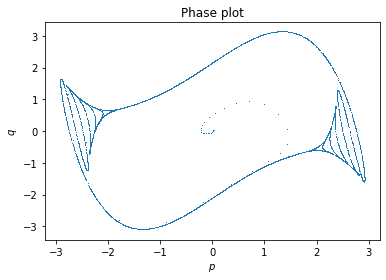

In [ ]:
fig, ax = plt.subplots()

ax.plot(ps, qs, ',')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$q$')
ax.set_title('Phase plot')

plt.show()

### Bonus

Remember way back in the beginning when I said that a `Figure` can contain multiple `Axes`? Here's an example of why that might be useful...we can explore how the system might change for different coefficient values other than 0.314.

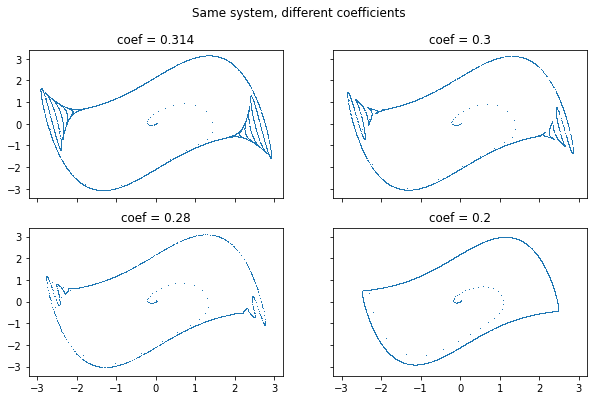

In [ ]:
coefs = [0.314, 0.3, 0.28, 0.2]

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10,6))

for i, ax in enumerate(axs.flatten()):
    coef = coefs[i]
    ps, qs = phase_plot_data(p_step, q_step, init_x=0.01, init_y=0.01, iters=10000)
    ax.plot(ps, qs, ',')
    ax.set_title('coef = {}'.format(coef))

fig.suptitle('Same system, different coefficients')

plt.show()
